In [1]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml("mnist_784", version= 1, as_frame= False)
print(mnist)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [6]:
import pandas as pd
mnist_show = pd.DataFrame(mnist.data)
mnist_show.head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:

x = mnist['data']
y = mnist['target']
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

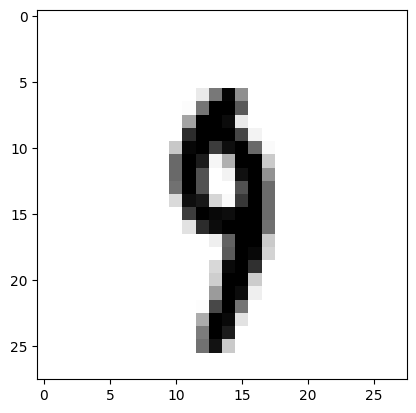

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
display = x[2600]   # Selecting the n'th image.like: 5000th image, or here 0 th image
display_image = display.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(display_image, cmap=matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()

In [14]:
y[2600]

'9'

In [15]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
paredict = dtc.predict(x_test)

In [20]:
dtc.score(x_test, y_test)

0.876

In [21]:
from sklearn import metrics

In [23]:
print(metrics.classification_report(y_test, paredict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.87      0.87      0.87      1032
           3       0.82      0.85      0.83      1010
           4       0.87      0.88      0.88       982
           5       0.83      0.84      0.84       892
           6       0.90      0.87      0.89       958
           7       0.91      0.89      0.90      1028
           8       0.82      0.81      0.81       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



In [24]:
print(metrics.confusion_matrix(y_test, paredict))

[[ 917    1    7    7    5   11   11    5    8    8]
 [   2 1085   10    5    2    7    5    3   15    1]
 [  15    5  894   32   11   12    9   21   28    5]
 [   8    9   28  860    7   45    6    9   20   18]
 [   5    4    8    4  861    7   15   12   20   46]
 [  13    6    3   51    8  748   21    9   21   12]
 [  16    3   14   10   21   21  834    2   30    7]
 [   3   15   23   21    8    4    2  917   10   25]
 [  12    7   29   43   22   29   15   11  787   19]
 [  13    6   11   21   40   13    6   19   23  857]]


In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
#prediction
predict = lr.predict(x_test)
#print(predict)
lr.score(x_test, predict)

1.0

In [27]:
print(metrics.classification_report(y_test, paredict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.87      0.87      0.87      1032
           3       0.82      0.85      0.83      1010
           4       0.87      0.88      0.88       982
           5       0.83      0.84      0.84       892
           6       0.90      0.87      0.89       958
           7       0.91      0.89      0.90      1028
           8       0.82      0.81      0.81       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



In [32]:
dtc.predict([x_test[22]])

array(['6'], dtype=object)

In [33]:
y_test[22]

'6'